# debug viz

In [ ]:
import os, sys
sys.path.append(r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/viz')
from PIL import Image
import matplotlib.pyplot as plt
import plt_draw
import importlib
importlib.reload(plt_draw);

In [ ]:
img_list = [
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/001.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/002.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/003.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/004.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/005.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/006.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/007.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/008.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/009.jpg',
    '/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/img/010.jpg',
]

draw = plt_draw.PLTDraw()
axes_name = 'image'
artist_name = 'images'
draw.subplot(1, 1, axes_name)

plt.ion() #开启interactive mode 成功的关键函数
for i in range(10):
    img_file = img_list[i%len(img_list)]
    print(f'{img_file=}')
    img = Image.open(img_file)
    
    draw.draw_image(img, axes_name, artist_name, show=True, keep=False)

    plt.draw()
    plt.pause(0.5)

plt.ioff()


# 显示文件夹

In [ ]:
import os
import cv2
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


wid_imgbox = widgets.Image(format='jpg', height=300, width=400)
display(wid_imgbox)



root = "/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir"
for file in os.listdir(root):
    canvas = cv2.imread(os.path.join(root, file))
    wid_imgbox.value = cv2.imencode('.jpg', canvas)[1].tobytes()
    cv2.waitKey(2000)


# 显示视频

In [ ]:
import os
import cv2
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np
from io import BytesIO


image_list = []
cur_corsor = -1
auto_loop = True


def resize_image(image, shape):
    image_ = Image.new('RGB', shape)
    shape_rate = image.size[0:2] / np.array(shape)
    if shape_rate[0] > shape_rate[1]:
        image__ = image.resize((int(image.size[0]*shape_rate[0]), int(image.size[1]*shape_rate[0])))
    else:
        image__ = image.resize((int(image.size[0]*shape_rate[1]), int(image.size[1]*shape_rate[1])))

    image_.paste(image__, (0, 0))
    return image_


def btn_click(sender):
    global image_list, cur_corsor, wid_imgbox, image_show_x_wid, image_show_y_wid
    if len(image_list) < 1:
        print(f'please select image dir !!!')
        return 
    if sender.description == '-->':
        cur_corsor = (cur_corsor + 1) % len(image_list)
        image_dir_num_wid.value = f'{len(image_list)}/{cur_corsor}'

        image = Image.open(image_list[cur_corsor])
        image = resize_image(image, (int(image_show_x_wid.value), int(image_show_y_wid.value)))
        img_bytes = BytesIO()
        image = image.save(img_bytes, format='JPEG')
        image = img_bytes.getvalue()
        wid_imgbox.value = image

        # canvas = cv2.imread(image_list[cur_corsor])
        # canvas = cv2.imencode('.jpg', canvas)[1].tobytes()
        # wid_imgbox.value = canvas
    elif sender.description == '<--':
        cur_corsor = (cur_corsor - 1) % len(image_list)
        image_dir_num_wid.value = f'{len(image_list)}/{cur_corsor}'

        image = Image.open(image_list[cur_corsor])
        image = resize_image(image, (int(image_show_x_wid.value), int(image_show_y_wid.value)))
        img_bytes = BytesIO()
        image = image.save(img_bytes, format='JPEG')
        image = img_bytes.getvalue()
        wid_imgbox.value = image
    else:
        cur_corsor = 0
        image_dir_num_wid.value = f'{len(image_list)}/{cur_corsor}'

        image = Image.open(image_list[cur_corsor])
        image = resize_image(image, (int(image_show_x_wid.value), int(image_show_y_wid.value)))
        img_bytes = BytesIO()
        image = image.save(img_bytes, format='JPEG')
        image = img_bytes.getvalue()
        wid_imgbox.value = image

def fn_image_dir(sender):
    global image_list, cur_corsor, show_fig, show_axes
    if sender.value is None or sender.value == '':
        sender.value = r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/eval_dir/images'
    image_list = os.listdir(sender.value)
    image_list = [os.path.join(sender.value, img_file) for img_file in image_list if img_file.endswith('.jpg')]
    cur_corsor = 0
    image_dir_num_wid.value = f'{len(image_list)}/{cur_corsor}'
    print(f'{len(image_list)=}')
    

def auto_btn_click(sender):
    global auto_loop
    auto_loop = True
    print(f'{image_auto_show_freq.value=}')
    def on_timer():
        global auto_loop, cur_corsor, image_list, image_dir_num_wid, image_auto_show_freq
        cur_corsor = (cur_corsor + 1) % len(image_list)
        image = Image.open(image_list[cur_corsor])
        image = resize_image(image, (int(image_show_x_wid.value), int(image_show_y_wid.value)))
        img_bytes = BytesIO()
        image = image.save(img_bytes, format='JPEG')
        image = img_bytes.getvalue()
        wid_imgbox.value = image
        if auto_loop:
            t = Timer(int(image_auto_show_freq.value), on_timer)
            t.start()
    from threading import Timer
    t = Timer(int(image_auto_show_freq.value), on_timer)
    t.start()

    
def normal_bnt_click(sender):
    global auto_loop
    auto_loop = False
    print(f'[normal_bnt_click]  {auto_loop=}')

    
    
wid_imgbox = widgets.Image(format='jpg', height=300, width=400)

wid_pre = widgets.Button(description = "<--", tooltip = 'this is a button')
wid_next = widgets.Button(description = "-->", tooltip = 'this is a button')
wid_pre.on_click(btn_click)
wid_next.on_click(btn_click)
auto_show = widgets.Button(description = "自动播放", tooltip = '自动播放')
normal_show = widgets.Button(description = "正常播放", tooltip = '正常播放')
auto_show.on_click(auto_btn_click)
normal_show.on_click(normal_bnt_click)

image_dir_wid = widgets.Text(description='image dir:')
image_dir_num_wid = widgets.Text(description='image num: ')
image_auto_show_freq = widgets.Text(description='image auto-show freq: ', default=1)
image_dir_wid.on_submit(fn_image_dir)
# image_dir_wid.observe(fn_image_dir, 'value')

image_show_x_wid = widgets.Text(description='image x:')
image_show_y_wid = widgets.Text(description='image y:')

box_wid1 = widgets.Box([wid_pre, wid_next, auto_show, normal_show])
box_wid2 = widgets.Box([image_dir_wid, image_dir_num_wid, image_auto_show_freq])
box_wid3 = widgets.Box([image_show_x_wid, image_show_y_wid])
display(box_wid1, box_wid2, box_wid3, wid_imgbox)



In [ ]:
import os, sys
sys.path.append(r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/viz')
import pil_draw
import PIL.Image as Image

In [ ]:
img_file1 = r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir/street.jpg'
img_file2 = r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir/027.jpg'
img1 = Image.open(img_file1)
img2 = Image.open(img_file2)

In [ ]:
def paste(img1, img2, lt=(0, 0), center=False, copy=False):
    img1_ = img1
    if copy:
        img1_ = img1.copy()
    lt_ = lt
    if center:
        w1, h1 = img1_.size
        w2, h2 = img2.size
        lt_ = (int((w1-w2)/2), int((h1-h2)/2))        
    img1_.paste(img2, lt_)
    return img1_

In [ ]:
img12 = pil_draw.paste(img1, img2, lt=(0,0), center=True)
img12.show()

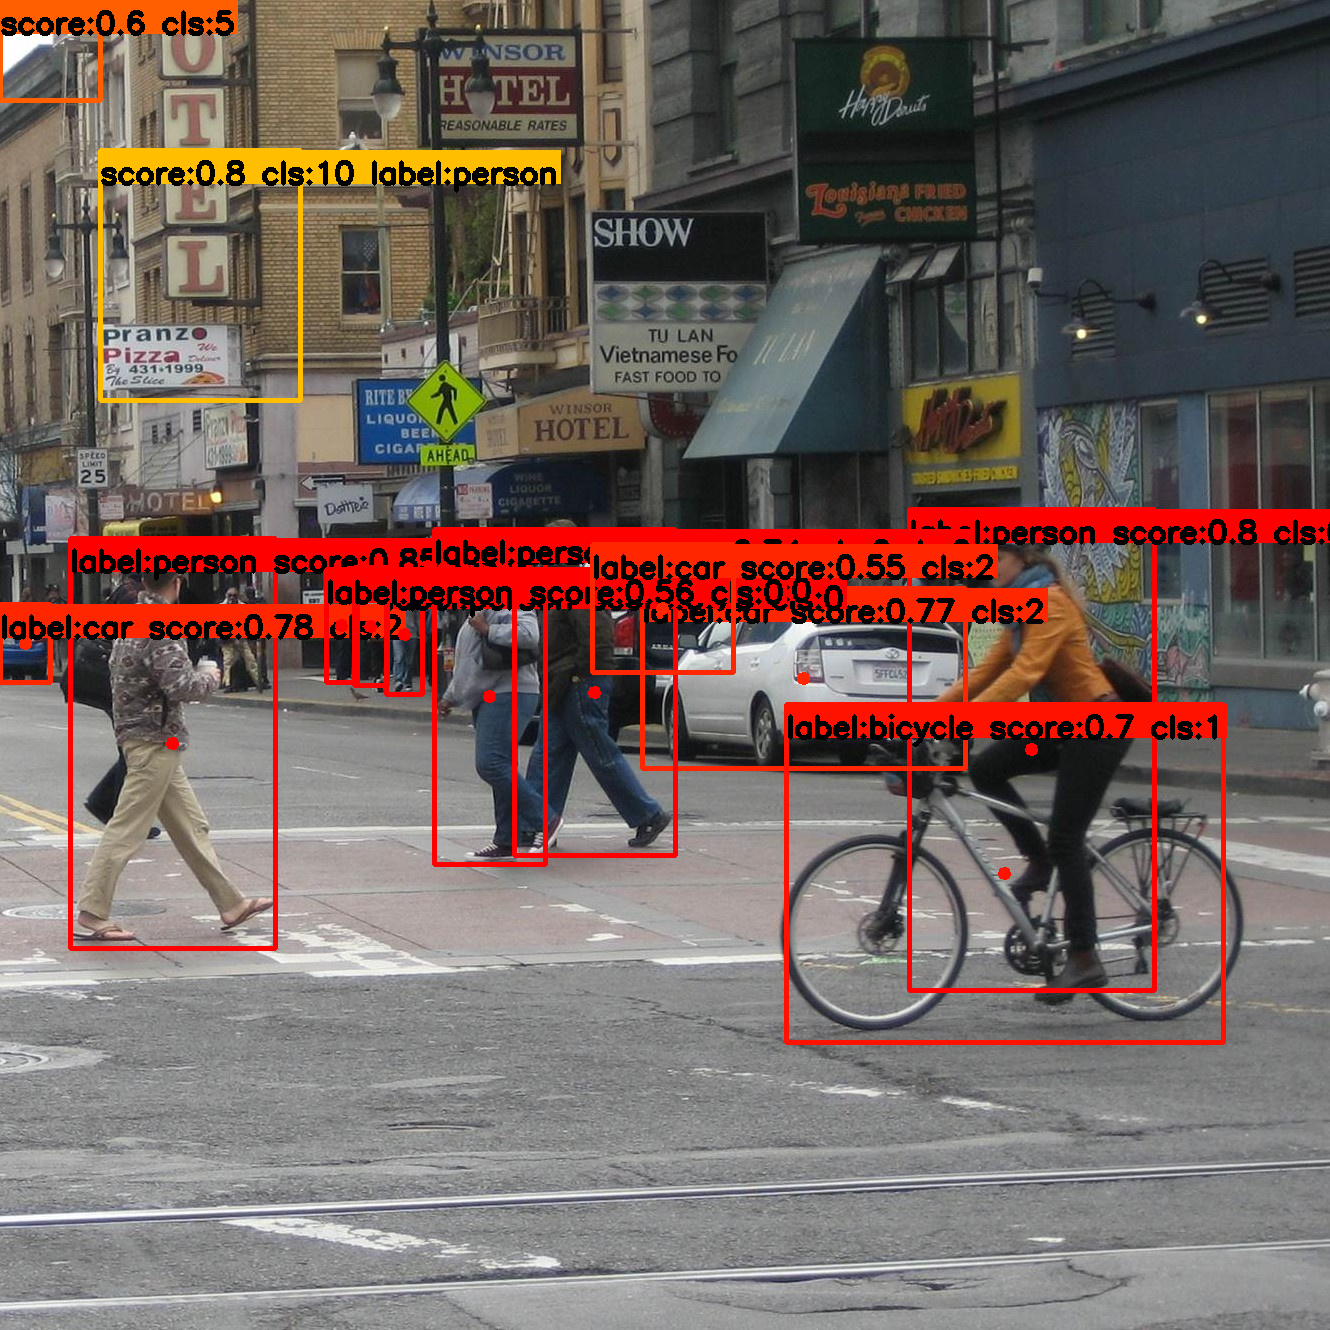

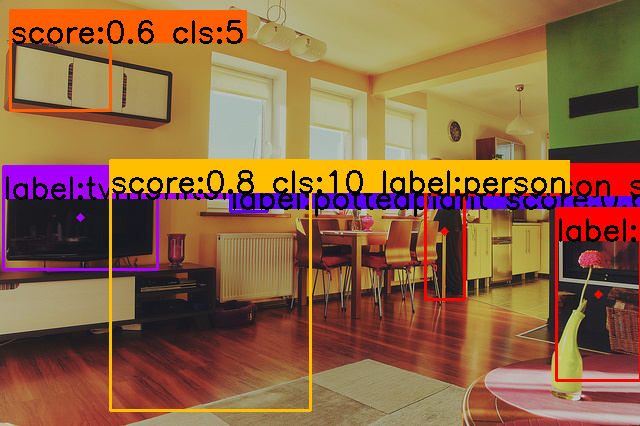

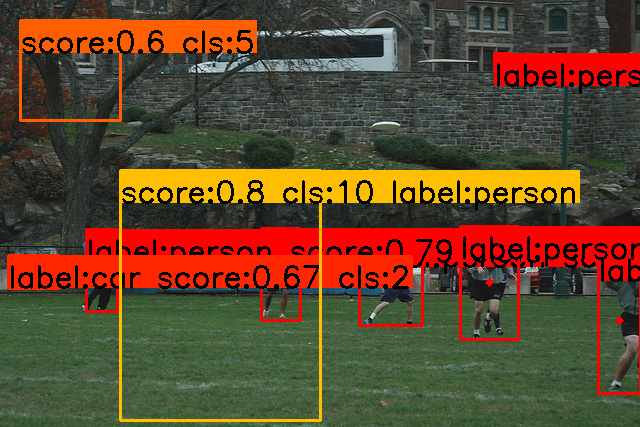

In [1]:
import os, sys
sys.path.append(r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/viz')
import pil_draw
import PIL.Image as Image
import numpy as np


img_files = [
    r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir/street.jpg',
    r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir/001.jpg',
    r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir/026.jpg'
]

bboxes = np.array([[0, 0, 100, 100], [100, 150, 300, 400]])

for idx, img_file in enumerate(img_files):
    img = Image.open(img_file)

    bboxes_ = bboxes + 10*idx
    labels = [{'score': 0.6, 'cls': 5}, {'score': 0.8, 'cls': 10, 'label': 'person'}]
    img = pil_draw.CVDraw().rectangle(np.array(img), bboxes_, labels=labels)

    Image.fromarray(img).show()

In [ ]:
import math
import cv2
FONT_SCALE = 2e-3  # Adjust for larger font size in all images
THICKNESS_SCALE = 1e-3  # Adjust for larger thickness in all images
TEXT_Y_OFFSET_SCALE = 1e-3  # Adjust for larger Y-offset of text and bounding box
img_width_to_bboxes = {
    2000: [
        {"xywh": [120, 400, 1200, 510], "label": "car"},
        {"xywh": [1080, 420, 790, 340], "label": "car"},
    ],
    600: [
        {"xywh": [35, 120, 360, 155], "label": "car"},
        {"xywh": [325, 130, 235, 95], "label": "car"},
    ],
}
def add_bbox_and_text() -> None:
    for img_width, bboxes in img_width_to_bboxes.items():
        # Base image from https://www.pexels.com/photo/black-suv-beside-grey-auv-crossing-the-pedestrian-line-during-daytime-125514/
        # Two rescaled versions of the base image created with width of 600px and 2000px
        img = cv2.imread(r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir/street.jpg')
        height, width, _ = img.shape
        for bbox in bboxes:
            x, y, w, h = bbox["xywh"]
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(
                img,
                bbox["label"],
                (x, y - int(height * TEXT_Y_OFFSET_SCALE)),
                fontFace=cv2.FONT_HERSHEY_TRIPLEX,
                fontScale=min(width, height) * FONT_SCALE,
                thickness=math.ceil(min(width, height) * THICKNESS_SCALE),
                color=(0, 255, 0),
            )
        cv2.imwrite(f"test_text.jpg", img)
if __name__ == "__main__":
    add_bbox_and_text()

In [ ]:
from PIL import ImageFont

img = cv2.imread(r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir/street.jpg')


def optimal_font_dims(img, font_scale = 1e-3, thickness_scale = 1e-3):
    h, w, _ = img.shape
    font_scale = np.floor(font_scale * max(w, h)).astype('int32')
    thickness = max(math.ceil((w+h)*thickness_scale), 1)
    return font_scale, thickness


text = "person: 0.99 score: 0.85"
# text = "人: 0.99 得分: 0.85"
font_face = cv2.FONT_ITALIC
# cv2.FONT_HERSHEY_DUPLEX

font_scale, thickness = optimal_font_dims(img)
font_size = cv2.getFontScaleFromHeight(font_face, pixelHeight=80, thickness=thickness)
# font_scale = font_size

textSize, baseline = cv2.getTextSize(text, font_face, font_scale, thickness)
textSizeWidth, textSizeHeight = textSize
print(f'{textSize=}  {baseline=}  {font_scale=}  {thickness=}  {font_size=}')

img = cv2.rectangle(img, (100, 100-baseline), (100+textSizeWidth, 100+textSizeHeight+baseline), color=(0,255,255), thickness=-1)
img = cv2.putText(img, text, (100, 100+textSizeHeight), font_face, font_scale, (0,0,0), thickness)

cv2.imwrite(f"test_text.jpg", img)

In [ ]:
from PIL import ImageFont, ImageDraw

img = cv2.imread(r'/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/exps/runs/pred_dir/street.jpg')


font        = ImageFont.truetype(font='/data8022/ylw/code/yolo/yolox-pytorch/src_test_1/model_data/simhei.ttf', size=np.floor(3e-2 * img.shape[1] + 0.5).astype('int32'))
thickness   = int(max((img.shape[0] + img.shape[1]) // np.mean([640, 640]), 1))

print(f'{font=}')

text = "person: 0.99 score: 0.85"
# text = "人: 0.99 得分: 0.85"
# text = text.encode('utf-8')

img = Image.fromarray(img)
left, top, right, bottom = 100, 100, 200, 500
draw_img = ImageDraw.Draw(img)
label_size = draw_img.textsize(text, font)

if top - label_size[1] >= 0:
    text_origin = np.array([left, top - label_size[1]])
else:
    text_origin = np.array([left, top + 1])

draw_img.rectangle([tuple(text_origin), tuple(text_origin + label_size)], fill=(0,0,255))
draw_img.text(text_origin, text, fill=(0, 0, 0), font=font)

img = np.array(img)
cv2.imwrite(f"test_text.jpg", img)